<a href="https://colab.research.google.com/github/MiguelEconomics/colombian_holidays_2023/blob/main/festivos_colombia_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Días Festivos en Colombia 2023 - EDA
---


Para este análisis visual sobre los días festivos en Colombia en 2023 tendremos en cuenta los siguientes pasos:
1. Extraeremos los días festivos del año con su respectiva descripción con técnicas de WebScrapping de la página web https://www.calendario-colombia.com/calendario-2023
2. Limpiaremos los datos obtenidos con librerías de Python
3. Finalmente, realizaremos un análisis grafico de los datos

### Importación de liberías

Activaremos las siguientes librerías para el desarrollo del proyecto:

In [ ]:
%pip install dateparser

import dateparser # Útil para extracción de fechas en español
import matplotlib.pyplot as plt # Graficación de datos
import pandas as pd # Manipulación de datos
import re # Webscrapping
import requests # Webscrapping

from lxml import etree # Webscrapping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1. Extracción de datos de la Web (WebScrapping)

Al análizar la estructura de una página web (html) es posible extraer datos que no están disponibles para descarga directa. Es fundamental tener en cuenta que no todas las páginas web tienen permitido el WebScrapping. Para este caso, tras la revisión del documento robots.txt de la página www.calendario-colombia.com se comprueba que no hay restricciones para la extración de los datos.

Archivo robots.txt: https://www.calendario-colombia.com/robots.txt

In [ ]:
# URL de la página web
url = "https://www.calendario-colombia.com/calendario-2023"

# Realizar la solicitud GET y obtener el contenido HTML
response = requests.get(url)
html = response.content

# Crear el árbol de análisis
tree = etree.HTML(html)

# Extraer los títulos y valores de todos los festivos
valores = tree.xpath("//a[@class='festivo']/@title")

# Expresión regular para extraer la fecha y el nombre del día festivo
pattern = r'(\w+ \d+ de \w+ de \d+) - (.+) -'

# Lista para almacenar los resultados
resultados = []

# Iterar sobre los valores extraídos
for valor in valores:
    match = re.search(pattern, valor)
    if match:
        fecha = match.group(1)
        nombre = match.group(2)
        resultados.append({'Fecha': fecha, 'Día Festivo': nombre})

# Crear un DataFrame con los resultados
df = pd.DataFrame(resultados)

# Obtener la columna de fecha como texto
fechas_texto = df['Fecha']

# Convertir las fechas de texto a tipo fecha
fechas = []
for fecha_texto in fechas_texto:
    fecha = dateparser.parse(fecha_texto, languages=['es'])
    fechas.append(fecha)

# Actualizar la columna de fecha en el DataFrame
df['Fecha'] = fechas

df


,Fecha,Día Festivo
0,2023-01-01,Año Nuevo
1,2023-01-09,Festivo por el día de los Reyes Magos
2,2023-03-20,Festivo por el día de San José
3,2023-04-02,Domingo de Ramos
4,2023-04-06,Jueves Santo
5,2023-04-07,Viernes Santo
6,2023-04-09,Domingo de Pascua o Resurrección
7,2023-05-01,Día del trabajo
8,2023-05-22,Festivo por el Día de la Ascensión
9,2023-06-12,Festivo por el día de Corpus Christi


### 2. Limpieza de datos

Para la graficación de los datos crearemos una nueva columna que identifique si el día festivo está relacionado a la religión o una fiesta nacional. 

La columna es creada luego de una lectura visual, donde 1 representa un festivo con motivo religioso y 0 un festivo por celebración nacional.

In [ ]:
religion_list = [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]

In [ ]:
df["religion"] = religion_list

In [ ]:
df

,Fecha,Día Festivo,religion
0,2023-01-01,Año Nuevo,0
1,2023-01-09,Festivo por el día de los Reyes Magos,1
2,2023-03-20,Festivo por el día de San José,1
3,2023-04-02,Domingo de Ramos,1
4,2023-04-06,Jueves Santo,1
5,2023-04-07,Viernes Santo,1
6,2023-04-09,Domingo de Pascua o Resurrección,1
7,2023-05-01,Día del trabajo,0
8,2023-05-22,Festivo por el Día de la Ascensión,1
9,2023-06-12,Festivo por el día de Corpus Christi,1


Luego de la clasificación obtenemos 6 días festivos que no se relacionan con un motivo religioso.

In [ ]:
festivo_religion = df[df["religion"] == 1] 
festivo_nacional = df[df["religion"] == 0]

In [ ]:
festivo_religion, festivo_nacional

(        Fecha                                      Día Festivo  religion
 1  2023-01-09            Festivo por el día de los Reyes Magos         1
 2  2023-03-20                   Festivo por el día de San José         1
 3  2023-04-02                                 Domingo de Ramos         1
 4  2023-04-06                                     Jueves Santo         1
 5  2023-04-07                                    Viernes Santo         1
 6  2023-04-09                 Domingo de Pascua o Resurrección         1
 8  2023-05-22               Festivo por el Día de la Ascensión         1
 9  2023-06-12             Festivo por el día de Corpus Christi         1
 10 2023-06-19  Festivo por el día del Sagrado Corazón de Jesús         1
 11 2023-07-03      Festivo por el día de San Pedro y San Pablo         1
 14 2023-08-21             Festivo por la Asunción de la Virgen         1
 16 2023-11-06           Festivo por el día de todos los Santos         1
 18 2023-12-08                        

Para fortalecer nuestro análisis crearemos una columna que muestre la diferencia de días entre fechas festivas. Bajo ese críterio, el valor para el primero de enero resulta NA.

In [ ]:
# Calcular la diferencia en días respecto al festivo inmediatamente anterior
df['Diferencia (días)'] = df['Fecha'].diff().dt.days

# Eliminar la primera fila (NaN)
df = df.dropna().reset_index(drop=True)

Finalmente, realizaremos algunos ajustes de formato para mejorar la graficación.

In [ ]:
# Añadir festivo del 1 de enero a la lista de festivos
df = pd.concat([pd.DataFrame([{'Día Festivo': 'Año Nuevo', 'Fecha': pd.Timestamp('2023-01-01'), 'religion': 0}]), df], ignore_index=True)

# Mapear las abreviaciones de los meses en español
meses_espanol = {
    'Jan': 'Ene',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Apr': 'Abr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Ago',
    'Sep': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dec': 'Dic'
}

# Formatear la fecha como día y tres letras del mes en español
df['Fecha_formateada'] = df['Fecha'].dt.strftime('%d %b')
df['Fecha_formateada'] = df['Fecha_formateada'].apply(lambda x: meses_espanol[x.split()[1]] + ' ' + x.split()[0])

### 3. Graficación

El resultado final de nuestro ejercicio se sintetiza en la siguiente gráfica:

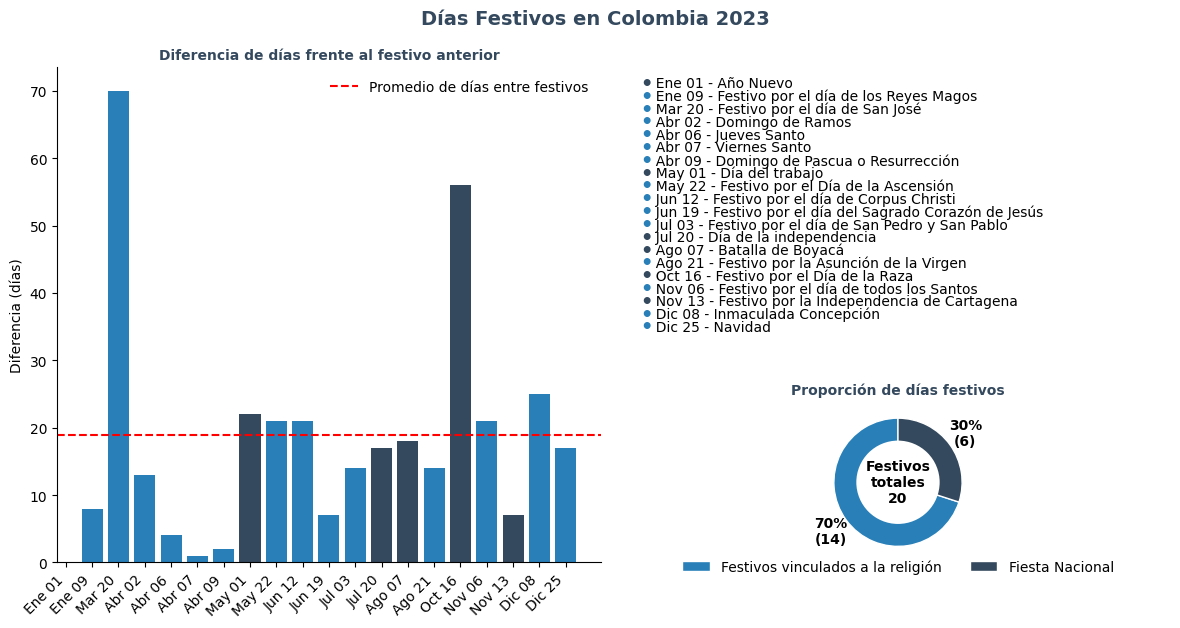

In [ ]:
# Configurar el tamaño de la figura y los subplots
fig = plt.figure(figsize=(12, 6))

# ---------------- Gráfico de barras - Diferencia de días ---------------- #
ax1 = fig.add_subplot(2, 2, (1, 3))
colors = ['#34495E' if religion == 0 else '#2980B9' for religion in df['religion']]
bars = ax1.bar(df.index, df['Diferencia (días)'], color=colors)
ax1.set_ylabel('Diferencia (días)')
ax1.set_title('Diferencia de días frente al festivo anterior', color='#34495E', fontsize=10, fontweight='bold')

# Cambiar las etiquetas del eje x a los meses en español
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Fecha_formateada'], rotation=45, ha='right')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Calcular el promedio de días entre festivos
promedio_dias = df['Diferencia (días)'].mean()

# Agregar la barra horizontal del promedio de días
ax1.axhline(y=promedio_dias, color='red', linestyle='--', label='Promedio de días entre festivos')
ax1.legend(frameon=False)

# ---------------- Lista de festivos ---------------- #
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis('off')
for i, (festivo, fecha, religion) in enumerate(zip(df['Día Festivo'], df['Fecha_formateada'], df['religion'])):
    y_coord = 0.9 - i * 0.08
    color = '#2980B9' if religion == 1 else '#34495E'
    ax2.annotate(f'•', xy=(0, y_coord), xycoords='axes fraction',
                 xytext=(10, 0), textcoords='offset points', ha='left', va='center', fontsize=14, weight='bold', color=color)
    ax2.annotate(f'  {fecha} - {festivo}', xy=(0, y_coord), xycoords='axes fraction',
                 xytext=(15, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

# ---------------- Gráfico de donut - Proporción de festivos ---------------- #
ax3 = fig.add_subplot(2, 2, 4)

festivos = df['religion'].value_counts()
total_festivos = festivos.sum()
colors = ['#2980B9', '#34495E']
pie = ax3.pie(festivos, labels=None,
              autopct=lambda pct: '{:.0f}%\n({:.0f})'.format(pct, pct/100 * total_festivos),
              startangle=90, wedgeprops={'edgecolor': 'white'},
              textprops={'color': 'black', 'fontsize': 10, 'weight':'bold'},
              pctdistance=1.3, colors=colors)

# Agregar un círculo blanco en el centro para convertirlo en un donut
center_circle = plt.Circle((0, 0), 0.65, fc='white')
fig.gca().add_artist(center_circle)

# Agregar texto en el centro con el total de días festivos
ax3.text(0, 0, 'Festivos\ntotales\n{}'.format(total_festivos), ha='center', va='center', fontsize=10, weight='bold')

# Ajustar la leyenda en dos columnas debajo del gráfico de donut
labels = ["Festivos vinculados a la religión", "Fiesta Nacional"]
legend = ax3.legend(pie[0], labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

ax3.set_title('Proporción de días festivos', color='#34495E', fontsize=10, fontweight='bold')

# Ajustar el espaciado entre los gráficos
fig.tight_layout()

# Establecer el título para todo el gráfico
fig.suptitle('Días Festivos en Colombia 2023', fontsize=14, y=1.04, color='#34495E', fontweight='bold')

# Mostrar los gráficos
plt.show()




In [ ]:
df['Diferencia (días)'].mean()

18.842105263157894

### <h6 align="center" style="font-size:2vw"><i> Autor: Miguel Angel Moreno Barajas </i><h6/>
### <h6 align="center" style="font-size:2vw"><a href="https://www.linkedin.com/in/miguelmorenods/" target="_blank">https://www.linkedin.com/in/miguelmorenods/</a><h6/>